# Concepts

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

<https://www.brunel.ac.uk/people/simon-shaw>.


<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

# Penguins: Exploring Some Key Concepts

We'll be using the *penguins* data that we have seen before in order
to introduce, understand and work with these concepts:

- Binary Classifiers
- Confusion Matrices
- Decision Boundaries
- True and False Postives and Negatives
- sensitivity, specificity, precision, recall, F1 score, prevalence,
- Unsupervised and Supervised Learning, parameters

These terms and their usage will be coming back again and again.

We will also discuss the fairness dilemma, using Sumpter (2021) as a source:

- Sumpter (2021) Ethics in machine learning, In: Machine Learning: A First Course for Engineers and Scientists, Cambridge University Press

This is no more than Chapter 12 of our reference book [MLFCES] as introduced in an earlier session:

- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm, Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. <http://smlbook.org>

First we bring in our standard imports...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import time

... plus the newer ones we learned about last time. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Back to where we were

We'll bring in the penguins data set and clean it up just as in the previous session. 
we do this bit quickly because there is nothing new here.


In [3]:
dfp = sns.load_dataset('penguins')
dfp2 = dfp.dropna()
dfp2.isna().sum()
dfp2 = dfp2.reset_index(drop=True)

In [4]:
dfp.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
dfp2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


We have already seen how we can use $k$-NN to predict the species in
column zero, from the numerical data in columns 2 - 5.

Here is that code again...

We fitted the model using the Manhattan metric:
$\Vert\boldsymbol{x}^* - \boldsymbol{x}_i\Vert_1$, 
and then plotted the confusion matrix and performance data. 

In [6]:
# create our labelled training and test data sets with 60/40 train/test split
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [7]:
# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# obtain the classifier and fit it using 2 nearest neighbours
# and the Manhattan norm
classifier = KNeighborsClassifier(n_neighbors=2, p=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [9]:
# Now use the fitted model from the training data to predict
# from the test data.
y_pred = classifier.predict(X_test)

In [10]:
# create a confusion matrix to assess the performance

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

clsrep = classification_report(y_test, y_pred)
print("Classification Report:",)
print(clsrep)

accsc = accuracy_score(y_test,y_pred)
print("Accuracy:", accsc)

Confusion Matrix:
[[72  0  0]
 [ 5 19  0]
 [ 0  0 38]]
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        72
   Chinstrap       1.00      0.79      0.88        24
      Gentoo       1.00      1.00      1.00        38

    accuracy                           0.96       134
   macro avg       0.98      0.93      0.95       134
weighted avg       0.97      0.96      0.96       134

Accuracy: 0.9626865671641791


### The Confusion Matrix

The confusion matrix is square with the same number of rows/columns
as there are values for the label. In our case there are three 
possible label values: *Adelie*, *Chinstrap*, and *Gentoo*. We can refer
to these as group 1, 2 and 3.

The entry in row $i$ and column $j$ of the confusion matrix tells
us how many data points in `X_test` that were in group $i$ were
predicted by the model to be in group $j$.

Now, the representation of the confusion matrix above is a numpy
array and although it is useful for coding, it isn't very 
user friendly. The following code gives us something much nicer,
and it is much easier to understand.

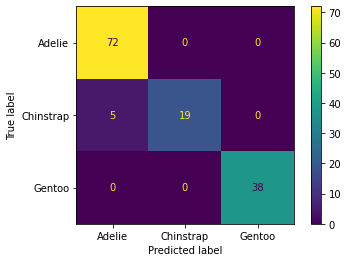

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
cmplot = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
cmplot.plot()
plt.show()

We can now immediately get a feeling for *how good* the model is. The diagonal
elements tell us how many species predictions match the true value. The
off-diagonals tell us how many misses there are, and how they missed.

For example, the number in the middle of the top row tells us how many Adelie
penguins were mistakenly predicted to be Chinstraps.

Also, the overall accuracy percentage can be determined by adding all the
numbers in the matrix, calling the total $B$, and adding all the diagonal elements
together, as $A$. The value of $A/B$ then tells us the proportion of correct 
predictions - and that is the *Accuracy* score above.

We haven't yet properly reviewed the mathematical concept and notion of
a matrix yet, although we will do soon. We will be coming back to 
confusion matrices over and over again though. 

The confusion matrix can be large or small. A particularly important case
is the $2\times 2$ case. 

## Binary Classifier

What we are doing above is _**classifying**_: given data from a specific observation
we are deciding what class that observation belongs to.

In the case above we are attempting to use physiological data to classify the 
species of penguin.

A particularly important type of classifier arises when we are simply trying to
decide 'Yes' or 'No', or 'True' or 'False', 'Guilty' or 'Innocent', 
'Diseased' or 'Healthy' and so on.

There are only two classes: generically termed **positive** and **negative**.

Such a classifier is called a **Binary Classifier**, and the confusion matrix bears
further discussion in this case.

Let's return to the penguin data and try to predict gender from the other
physiological characteristics. This will be a binary classifier, because 
it will either predict 'Female' (**positive**) or 'Not-Female' (**negative**).

Let's start by recalling the structure of the data frame.


In [12]:
dfp2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


We can double check that 'Female' and 'Male' are the only entries in the
gender column like this:

In [13]:
dfp2['sex'].unique()

array(['Male', 'Female'], dtype=object)

### Predicting gender from just two data items

Below we want to introduce the notion of a **decision boundary**. This is 
best done graphically and for that we want to work with 2D plots. 

This means that we want our $k$-NN classifioer to be able to predict gender from
just two columns of data.

The question then, is which two columns to choose?

Let's have a look at the choices available to us. We could try the table...


In [14]:
dfp2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


... but how are we ever going to be able to make a good decision as to which
pair of columns with that?

Here is a better way (at least if you don't have too many columns):

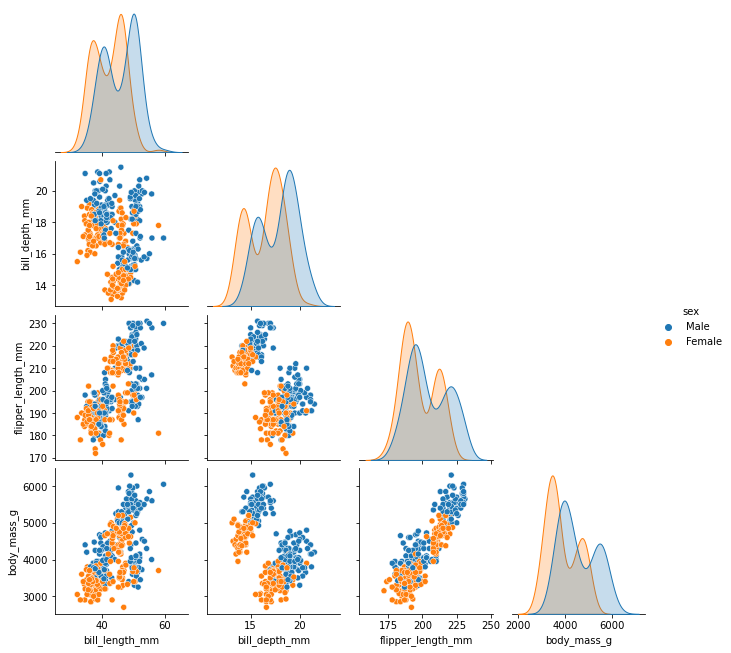

In [15]:
sns.pairplot(dfp2, corner=True, hue='sex', height=2.3)

It looks from this that *bill depth* and *body mass* should work well
to separate out genders.


Even here, the term **Decision Boundary** might make some intuitive sense
to you. What do you think it might mean?

Let's build the binary classifier using just these two columns, and 
get the confusion matrix just as before.

We'll do it all in one go, because we've seen all the steps before...

In [16]:
# extract the input/features X, and the output/labels y
X = dfp2.iloc[:, [3,5]].values
y = dfp2.iloc[:, 6].values
# optionally, print the first few just to check
print(X[0:4,:])
print(y[0:4])
# bifurcate the data to get a 40% test set, and 60% training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

# print out the sizes of the train and test sets
print('\n')
print('X_train has ', X_train.shape[0], ' rows and ', X_train.shape[1], ' columns')
print('y_train has ', y_train.shape[0], ' rows')
print('\n')
print('X_test has ', X_test.shape[0], ' rows and ', X_test.shape[1], ' columns')
print('y_test has ', y_test.shape[0], ' rows')
print('\n')

# get scaling parameters from the training data, 
scaler = StandardScaler()
scaler.fit(X_train)
# scale the training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# now classify using k=2, p=1 - as before
classifier = KNeighborsClassifier(n_neighbors=2, p=1)
classifier.fit(X_train, y_train)
# and then make predictions from the test data 
y_pred = classifier.predict(X_test)

# compare the predictions with the ground truth, or hold-out set,
cm = confusion_matrix(y_test, y_pred)

# and print the results out
print("Confusion Matrix:")
print(cm)
clsrep = classification_report(y_test, y_pred)
print("Classification Report:",)
print(clsrep)
accsc = accuracy_score(y_test,y_pred)
print("Accuracy:", accsc)

[[  18.7 3750. ]
 [  17.4 3800. ]
 [  18.  3250. ]
 [  19.3 3450. ]]
['Male' 'Female' 'Female' 'Female']


X_train has  199  rows and  2  columns
y_train has  199  rows


X_test has  134  rows and  2  columns
y_test has  134  rows


Confusion Matrix:
[[59  6]
 [17 52]]
Classification Report:
              precision    recall  f1-score   support

      Female       0.78      0.91      0.84        65
        Male       0.90      0.75      0.82        69

    accuracy                           0.83       134
   macro avg       0.84      0.83      0.83       134
weighted avg       0.84      0.83      0.83       134

Accuracy: 0.8283582089552238


We have seen before that there is another way to dosplay the 
confusion matrix that is friendlier on the eye. We'll do this
below.

Alos, we note from above that there are `134` data points in
the test set and so we should expect the numbers in the confusion matrix
to sum to that number. It's a useful check...

In [17]:
print(cm.sum())

134


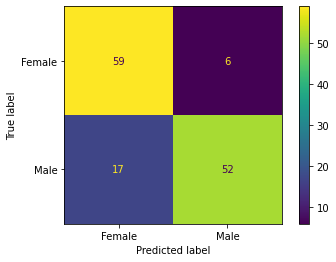

In [18]:
cmplot = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
cmplot.plot()
plt.show()

## True and False Positives and Negatives

There are a few particularly important pieces of terminology that 
are associated with binary classifiers. 

- **TP**, *True Positives*: This is the number of test data points
that are labelled **POSITIVE** for which the classifier correctly
(**truly**) predicted them as **POSITIVE**.

- **FP**, *False Positives*: This is the number of test data points
that are labelled **NEGATIVE** for which the classifier incorrectly
(**falsely**) predicted them as **POSITIVE**.

Since we are regarding **Female** as **POSITIVE**, we can see these 
numbers in the first column above.

Furthermore,

- **FN**, *False Negatives*. This is the number of test data points
that are labelled **POSITIVE** for which the classifier incorrectly
(**false**) predicted them as **NEGATIVE**.

- **TN**, *True Negatives*. This is the number of test data points
that are labelled **NEGATIVE** for which the classifier incorrectly
(**truly**) predicted them as **NEGATIVE**.

These last two are in the second column.

We can access these numbers in code as follows:


In [19]:
TP = cm[0,0]; FP = cm[1,0]; FN = cm[0,1]; TN = cm[1,1]
print(TP, FN)
print(FP, TN)

59 6
17 52


# Related Formulae and Measures

Once we have this data we can compute a wide variety of different performance
indicators. Here are the most commonly used, where we use $\mathrm{P}$ and
$\mathrm{N}$ for the number of positives and negatives overall in the test set.

- **Prevalance**:

$$
\mathrm{Prevalance} = \frac{\mathrm{P}}{\mathrm{P}+\mathrm{N}}
$$

- TPR: **True Positive Rate**, *sensitivity*, *recall*:

$$
\mathrm{TPR} = \frac{\mathrm{TP}}{\mathrm{P}} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}
$$


- TNR: **True Negative Rate**, *specificity*, *selectivity*:

$$
\mathrm{TNR} = \frac{\mathrm{TN}}{\mathrm{N}} = \frac{\mathrm{TN}}{\mathrm{TN}+\mathrm{FP}}
$$


- **Accuracy**:

$$
\mathrm{Accuracy} = \frac{\mathrm{TP}+\mathrm{TN}}{\mathrm{P}+\mathrm{N}}
$$

- **Balanced Accuracy**:

$$
\mathrm{Balanced\ Accuracy} = \frac{1}{2}\left(\mathrm{TPR}+\mathrm{TNR}\right)
$$



- PPV: **Positive Predictive Value**, *precision*:

$$
\mathrm{PPV} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}
$$



- NPV: **Negative Predictive Value**:

$$
\mathrm{NPV} = \frac{\mathrm{TN}}{\mathrm{TN}+\mathrm{FN}}
$$

- F1 score: this is the *harmonic mean* of precision and sensitivity:

$$
\mathrm{F1} = \frac{1}{2}\left(
\left(\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}\right)^{-1}
+
\left(\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}\right)^{-1}
\right)
= \frac{2\,\mathrm{TP}}{2\,\mathrm{TP}+\mathrm{FP}+\mathrm{FN}}
$$

Let's calculate some of these

In [20]:
P=TP+FN
N=FP+TN
print('P (# positives) = ', P)
print('N (# negatives) = ', N)
print('TPR (recall)    = ', TP/(TP+FN))
print('PPV (precision) = ', TP/(TP+FP))
print('F1              = ', 2*TP/(2*TP+FP+FN))
print('Accuracy        = ', (TP+TN)/(P+N))

P (# positives) =  65
N (# negatives) =  69
TPR (recall)    =  0.9076923076923077
PPV (precision) =  0.7763157894736842
F1              =  0.8368794326241135
Accuracy        =  0.8283582089552238


But - remember this?

In [21]:
print("Classification Report:",)
print(clsrep)
accsc = accuracy_score(y_test,y_pred)
print("Accuracy:", accsc)

Classification Report:
              precision    recall  f1-score   support

      Female       0.78      0.91      0.84        65
        Male       0.90      0.75      0.82        69

    accuracy                           0.83       134
   macro avg       0.84      0.83      0.83       134
weighted avg       0.84      0.83      0.83       134

Accuracy: 0.8283582089552238


With *Females* as *Positive* we can read off the **precision**,
**recall** and **F1 score** from the table, and obtain the
**accuracy** as a by-product of the classificaiton as well.

Also, **support** tells us what $\mathrm{P}$ is.


### Decision Boundaries

Let's now try and develop a bit more intuition as to how this classifier
works, and what we can expect from it.

The following observation will be relevant to other classification
techniques as well.

Let's recap:

- we have a training data set of features.
- these features are points in space.
- each training point has a label - its *class*
- we introduce a new point: it will have some 'nearest neighbours'
- we use the nearest neighbours' classes to classify the new point

Imaging this for a binary classifier where the the data points,
the features, are points in 2D.

We can imagine that the binary output can be coloured. For example:

> **RED** for **POSITIVE** (i.e. *female*)

> **BLUE** for **NEGATIVE** (i.e. *male*)

We can already see something like this from the scatter plots.


<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

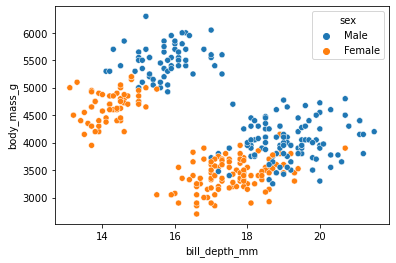

In [22]:
sns.scatterplot(data=dfp2, x="bill_depth_mm", y="body_mass_g", hue="sex")

From this diagram we can imagine drawing a line that attempts to separate the
RED and BLUE regions. Such a line is called a **Decision Boundary*.

On one side of the boudary we decide **POSITIVE**, and on the other we
decide **NEGATIVE**.

We're not going to actually get a pen and draw this line though.

We're going to illustrate the decision boundary with code.

# GOT HERE - fairness is below.

In [23]:
#print(X_test)
print(X_test.shape)

(134, 2)


In [24]:
print(y_pred)

['Female' 'Male' 'Female' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Female' 'Female' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female'
 'Male' 'Male' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Female' 'Female' 'Male' 'Female'
 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Female'
 'Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Female' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male'
 'Female' 'Male' 'Male' 'Female' 'Female' 'Female' 'Male' 'Male' 'Male'
 

[  1   3   4   5   7   8  11  12  13  16  17  22  26  27  30  37  40  43
  45  49  50  51  52  53  54  56  63  66  67  68  71  72  73  75  78  79
  80  82  85  86  90  96  97 103 107 109 111 113 114 118 119 120 121 124
 125 127 132 133] 58
[  0   2   6   9  10  14  15  18  19  20  21  23  24  25  28  29  31  32
  33  34  35  36  38  39  41  42  44  46  47  48  55  57  58  59  60  61
  62  64  65  69  70  74  76  77  81  83  84  87  88  89  91  92  93  94
  95  98  99 100 101 102 104 105 106 108 110 112 115 116 117 122 123 126
 128 129 130 131] 76
(134,)
(134, 2)
(58, 2)
(76, 2)


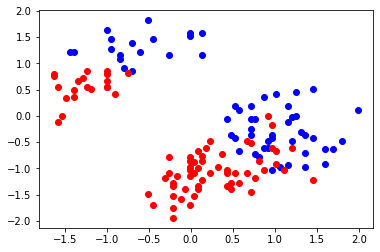

In [25]:
indxM = np.where(y_pred == 'Male')[0]
indxF = np.where(y_pred != 'Male')[0]
print(indxM, len(indxM))
print(indxF, len(indxF))
plt.scatter(X_test[indxM,0], X_test[indxM,1], color='blue')
plt.scatter(X_test[indxF,0], X_test[indxF,1], color='red')
print(y_pred.shape)
print(X_test.shape)
print(X_test[indxM,:].shape)
print(X_test[indxF,:].shape)

(333, 7) 133.20000000000002


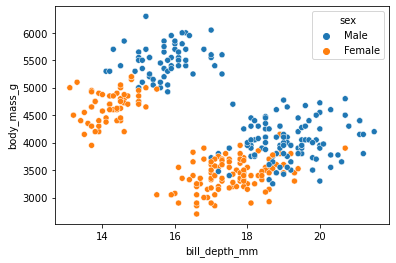

In [26]:
sns.scatterplot(data=dfp2, x="bill_depth_mm", y="body_mass_g", hue="sex")
print(dfp2.shape, 0.4*dfp2.shape[0])

In [27]:
# borrowed from
# https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
# define bounds of the domain
x1min, x1max = X_test[:, 0].min()-1, X_test[:, 0].max()+1
x2min, x2max = X_test[:, 1].min()-1, X_test[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(x1min, x1max, 0.1)
x2grid = np.arange(x2min, x2max, 0.1)
# create all of the lines and rows of the grid
xx1, xx2 = np.meshgrid(x1grid, x2grid)
print(xx1.shape)
print(xx2.shape)
#print(xx1)
#print(xx2)
#print(xx1.flatten())
#print(xx2.flatten())

(58, 57)
(58, 57)


In [28]:
#xx1xx2 = np.hstack((xx1.reshape((len(xx1),1)),xx2.reshape((len(xx2),1))))
xx1xx2 = np.stack((xx1.flatten(), xx2.flatten()), axis=-1)
#xx1xx2 = np.vstack((xx1.flatten(), xx2.flatten()))

#print(xx1xx2)
print(xx1xx2.shape)

(3306, 2)


In [29]:
y_pred = classifier.predict(xx1xx2)
#print(y_pred)

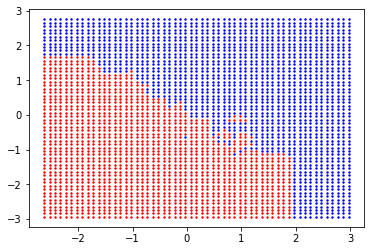

In [30]:
indxM = np.where(y_pred == 'Male')[0]
indxF = np.where(y_pred != 'Male')[0]
#print(indxM)
#print(indxF)
plt.scatter(xx1xx2[indxM,0], xx1xx2[indxM,1], color='blue' , s=2)
plt.scatter(xx1xx2[indxF,0], xx1xx2[indxF,1], color='red', s=2)

(333, 7) 133.20000000000002


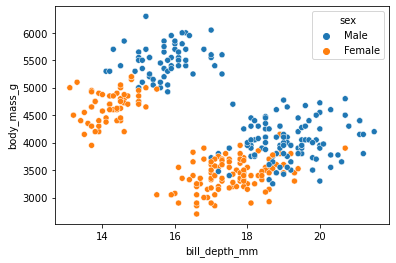

In [31]:
sns.scatterplot(data=dfp2, x="bill_depth_mm", y="body_mass_g", hue="sex")
print(dfp2.shape, 0.4*dfp2.shape[0])

### Fairness

- what do we mean by this?
- can a binary classifier ever be fair?

As mentioned above, we'll be using Sumpter (2021) as a source:

- Sumpter (2021) Ethics in machine learning, In: Machine Learning: A First Course for Engineers and Scientists, Cambridge University Press

This is in Chapter 12 of our reference book [MLFCES]:

- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm, Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. <http://smlbook.org>


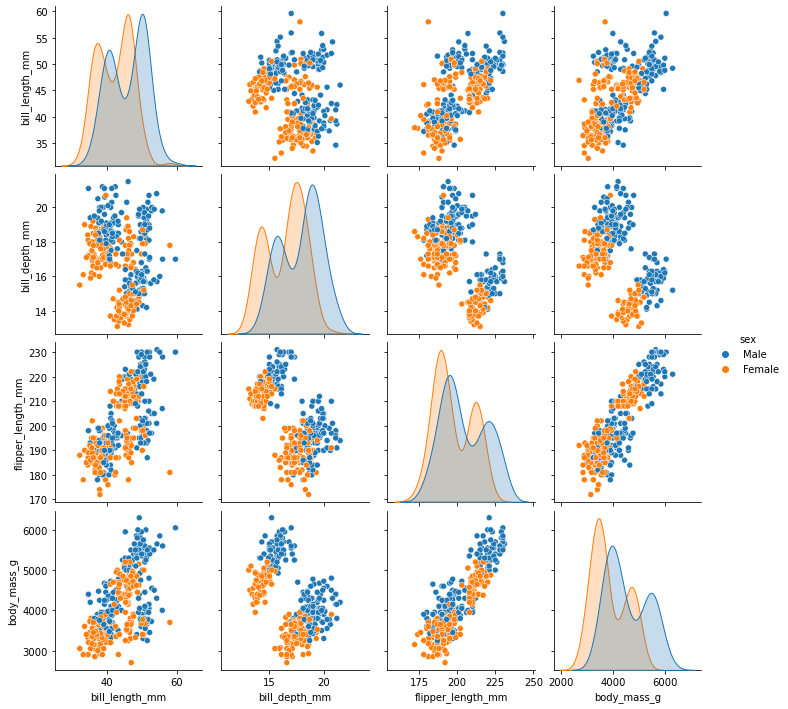

In [32]:
sns.pairplot(dfp2, hue='sex')

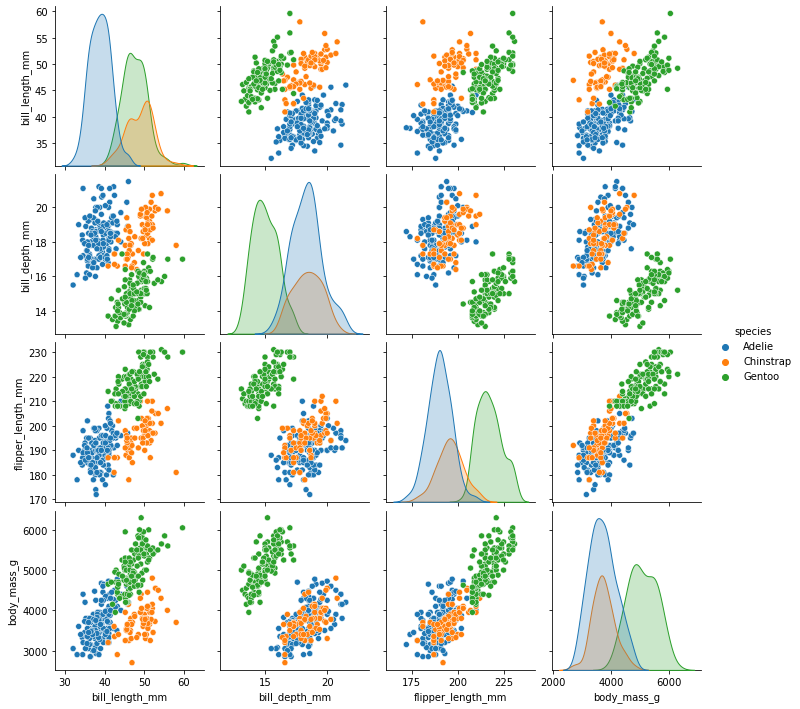

In [33]:
sns.pairplot(dfp2, hue='species')

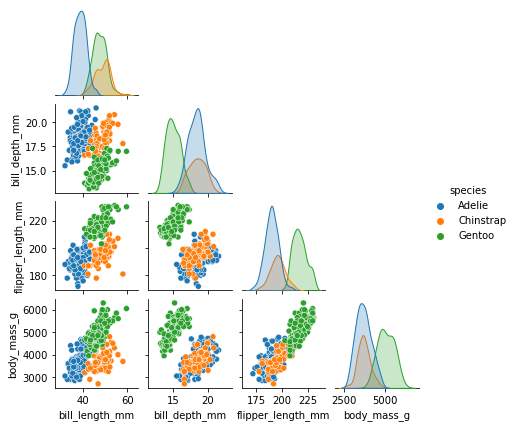

In [34]:
# lots of options for the above. See
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(dfp2, corner=True, hue='species', height=1.5)

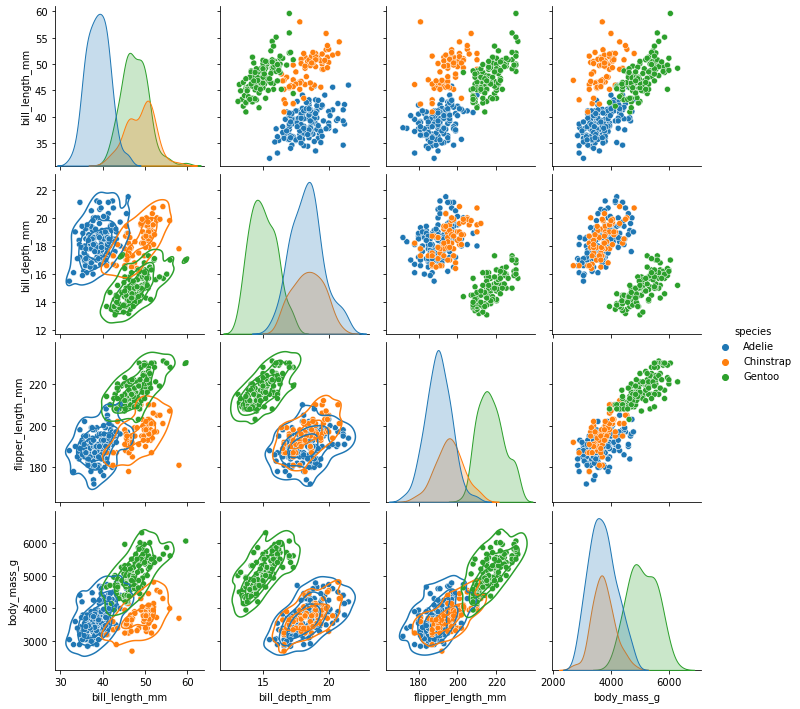

In [35]:
g = sns.pairplot(dfp2, diag_kind="kde", hue='species')
g.map_lower(sns.kdeplot, levels=4, color=".2")

The setting we assume at the outset is that we have a 'training set' of data consisting of 
$(x,y)$ pairs. 

Penguins

Use MNIST later on.

Need to do decision boundary

Need to comment on high norm choice in high dimensions



# extracting and plotting in `matplotlib`

We'll use this one

In [36]:
dfp2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [37]:
dfp2.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
332,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

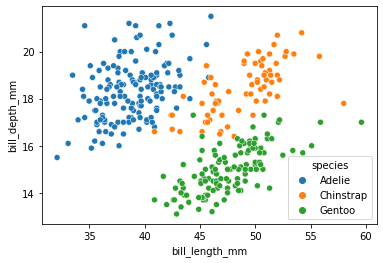

In [38]:
sns.scatterplot(data=dfp2, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [39]:
dfp2['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [40]:
dfA = dfp2.loc[dfp2['species'] == 'Adelie']
dfC = dfp2.loc[dfp2['species'] == 'Chinstrap']
dfG = dfp2.loc[dfp2['species'] == 'Gentoo']

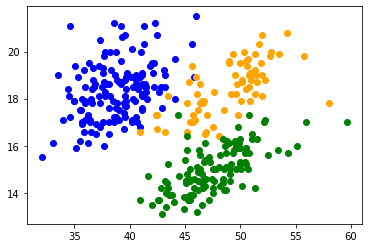

In [41]:
blA=np.array(dfA['bill_length_mm'].tolist())
bdA=np.array(dfA['bill_depth_mm'].tolist())
plt.scatter(blA,bdA,color='blue')

blC=np.array(dfC['bill_length_mm'].tolist())
bdC=np.array(dfC['bill_depth_mm'].tolist())
plt.scatter(blC,bdC,color='orange')

blG=np.array(dfG['bill_length_mm'].tolist())
bdG=np.array(dfG['bill_depth_mm'].tolist())
plt.scatter(blG,bdG,color='green')

In [42]:
dfA.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,146.000000,146.000000,146.000000,146.000000
mean,38.823973,18.347260,190.102740,3706.164384
std,2.662597,1.219338,6.521825,458.620135
min,32.100000,15.500000,172.000000,2850.000000
25%,36.725000,17.500000,186.000000,3362.500000
50%,38.850000,18.400000,190.000000,3700.000000
75%,40.775000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


## $k$-NN for regression

This technique can also be used for regression. See for example
<https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/>
for a demonstration of this using the California house data set
????????????

# Technical Notes

This originated from
<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook


In [43]:
%%bash
NBROOTNAME='4_concepts'
OUTPUTTING=1

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi

[NbConvertApp] Converting notebook 4_concepts.ipynb to html
[NbConvertApp] Writing 2240735 bytes to 4_concepts.html
[NbConvertApp] Converting notebook 4_concepts.ipynb to pdf
[NbConvertApp] Support files will be in 4_concepts_files/
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Writing 97652 bytes to notebook.tex
[N

# title

here is  my equatiomn

$$
-\nabla^2 u = f
$$


In [44]:
print('finished')

finished


## This can go into B_worksheet if useful

In [45]:
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 6].values
print(X[0:4,:])
print(y[0:4])

[[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 [  36.7   19.3  193.  3450. ]]
['Male' 'Female' 'Female' 'Female']


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [47]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
#from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2, p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:"); print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",); print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[57  4]
 [20 53]]
Classification Report:
              precision    recall  f1-score   support

      Female       0.74      0.93      0.83        61
        Male       0.93      0.73      0.82        73

    accuracy                           0.82       134
   macro avg       0.84      0.83      0.82       134
weighted avg       0.84      0.82      0.82       134

Accuracy: 0.8208955223880597


# Also in worksheet B

The manual confusion matrix using the ticker tape idea. Get derived 
quantities.

Bayes theorem for sens and spec. Turn it on its head as in our `joint`
paper.